In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='whitegrid', palette='bright')

In [4]:
data = pd.read_csv("./2020_Problem_D_DATA/fullevents.csv")
Events = data.groupby(["EventType", "EventSubType"]).size()
output = pd.DataFrame(Events)
output.to_csv("events.csv", index=True)
data.info()
data[data['EventType'] == 'Offside']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59271 entries, 0 to 59270
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MatchID              59271 non-null  int64  
 1   TeamID               59271 non-null  object 
 2   OriginPlayerID       59271 non-null  object 
 3   DestinationPlayerID  23644 non-null  object 
 4   MatchPeriod          59271 non-null  object 
 5   EventTime            59271 non-null  float64
 6   EventType            59271 non-null  object 
 7   EventSubType         59131 non-null  object 
 8   EventOrigin_x        59056 non-null  float64
 9   EventOrigin_y        59056 non-null  float64
 10  EventDestination_x   59047 non-null  float64
 11  EventDestination_y   59047 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 5.4+ MB


,MatchID,TeamID,OriginPlayerID,DestinationPlayerID,MatchPeriod,EventTime,EventType,EventSubType,EventOrigin_x,EventOrigin_y,EventDestination_x,EventDestination_y
128,1,Opponent1,Opponent1_D1,NaN,1H,457.039100,Offside,NaN,84.0,12.0,100.0,100.0
247,1,Huskies,Huskies_F3,NaN,1H,892.350866,Offside,NaN,76.0,8.0,0.0,0.0
356,1,Huskies,Huskies_F1,NaN,1H,1250.066342,Offside,NaN,74.0,98.0,0.0,0.0
692,1,Opponent1,Opponent1_D4,NaN,1H,2612.054635,Offside,NaN,88.0,45.0,100.0,100.0
734,1,Opponent1,Opponent1_D1,NaN,1H,2810.221212,Offside,NaN,89.0,17.0,100.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...
58161,38,Opponent14,Opponent14_F1,NaN,1H,853.798965,Offside,NaN,76.0,34.0,0.0,0.0
58284,38,Opponent14,Opponent14_F1,NaN,1H,1577.553216,Offside,NaN,61.0,27.0,0.0,0.0
58916,38,Opponent14,Opponent14_F1,NaN,2H,1198.739889,Offside,NaN,94.0,31.0,0.0,0.0
58960,38,Opponent14,Opponent14_F1,NaN,2H,1430.887828,Offside,NaN,92.0,48.0,0.0,0.0


In [61]:
Playtime={}
for i in range(38):
    data111 = pd.read_csv("./2020_Problem_D_DATA/Pass/Match"+str(i+1)+".csv", index_col= 0, header= 0)
    Players = data111.index
    for player in Players:
        if player in Playtime:
            Playtime[player]+=1
        else:
            Playtime[player]=1
#sorted(Playtime.items(),key=lambda x:x[1],reverse=True)
Playtime

{'G1': 38,
 'D1': 30,
 'D2': 23,
 'D3': 24,
 'D4': 22,
 'D5': 21,
 'M1': 33,
 'M2': 7,
 'M3': 30,
 'M4': 33,
 'M5': 5,
 'F1': 32,
 'F2': 31,
 'F3': 7,
 'D6': 15,
 'M6': 27,
 'M7': 1,
 'M8': 14,
 'M9': 12,
 'D7': 19,
 'F4': 19,
 'M10': 7,
 'M11': 8,
 'M12': 15,
 'M13': 4,
 'F5': 14,
 'F6': 14,
 'D8': 12,
 'D9': 2,
 'D10': 4}

In [5]:
Players = pd.DataFrame(data.groupby(["OriginPlayerID"]))[0]
MyPlayers = Players[Players.str.contains("Huskies") == True].tolist()
PlayersDict = {
    "Huskies_G1": 0,
    "Huskies_D1": 1,
    "Huskies_D2": 2,
    "Huskies_D3": 3,
    "Huskies_D4": 4,
    "Huskies_D5": 5,
    "Huskies_D6": 6,
    "Huskies_D7": 7,
    "Huskies_D8": 8,
    "Huskies_D9": 9,
    "Huskies_D10": 10,
    "Huskies_M1": 11,
    "Huskies_M2": 12,
    "Huskies_M3": 13,
    "Huskies_M4": 14,
    "Huskies_M5": 15,
    "Huskies_M6": 16,
    "Huskies_M7": 17,
    "Huskies_M8": 18,
    "Huskies_M9": 19,
    "Huskies_M10": 20,
    "Huskies_M11": 21,
    "Huskies_M12": 22,
    "Huskies_M13": 23,
    "Huskies_F1": 24,
    "Huskies_F2": 25,
    "Huskies_F3": 26,
    "Huskies_F4": 27,
    "Huskies_F5": 28,
    "Huskies_F6": 29,
}
PlayersDictRev={v:k for k,v in PlayersDict.items()}
PlayersDictShort={
    "G1":0,
    "D1":1,
    "D2":2,
    "D3":3,
    "D4":4,
    "D5":5,
    "D6":6,
    "D7":7,
    "D8":8,
    "D9":9,
    "D10":10,
    "M1":11,
    "M2":12,
    "M3":13,
    "M4":14,
    "M5":15,
    "M6":16,
    "M7":17,
    "M8":18,
    "M9":19,
    "M10":20,
    "M11":21,
    "M12":22,
    "M13":23,
    "F1":24,
    "F2":25,
    "F3":26,
    "F4":27,
    "F5":28,
    "F6":29
}
PlayersDictShortRev={v:k for k,v in PlayersDictShort.items()}
EventTypeList = pd.DataFrame(data.groupby(["EventType"]))[0].tolist()
EventSubTypeList = pd.DataFrame(data.groupby(["EventSubType"]))[0].tolist()
EventSubTypeList.append("Offside")

In [87]:
PlayerData = pd.DataFrame(index=PlayersDict.keys(), columns=EventSubTypeList, data=0.0)
N = data.shape[0]
for i in range(0,N):
    if (data['TeamID'][i] == 'Huskies'):
        try:
            PlayerData[data['EventSubType'][i]][PlayersDict[data['OriginPlayerID'][i]]] += 1
        except:
            data['EventSubType'][i] = 'Offside'
            PlayerData[data['EventSubType'][i]][PlayersDict[data['OriginPlayerID'][i]]] += 1
for i in range(30):
    for j in PlayerData.columns:
        PlayerData[j][i]/=Playtime[PlayersDictShortRev[i]]
PlayerData.index=PlayersDictShort.keys()
PlayerData

,Acceleration,Air duel,Ball out of the field,Clearance,Corner,Cross,Foul,Free Kick,Free kick cross,Free kick shot,...,Simple pass,Simulation,Smart pass,Substitution,Throw in,Time lost foul,Touch,Violent Foul,Whistle,Offside
G1,0.000000,0.710526,0.000000,0.447368,0.000000,0.000000,0.026316,3.052632,0.026316,0.000000,...,4.210526,0.000000,0.000000,0.000000,0.000000,0.0,1.657895,0.0,0.000000,0.000000
D1,0.100000,9.133333,0.000000,3.600000,0.000000,0.200000,0.633333,0.300000,0.000000,0.000000,...,25.600000,0.000000,0.133333,0.066667,0.133333,0.0,4.600000,0.0,0.000000,0.133333
D2,0.000000,5.086957,0.000000,4.478261,0.000000,0.043478,1.000000,0.521739,0.260870,0.000000,...,22.521739,0.000000,0.043478,0.130435,0.000000,0.0,2.652174,0.0,0.000000,0.130435
D3,0.125000,5.916667,0.000000,4.250000,0.000000,0.208333,0.333333,0.958333,0.250000,0.000000,...,26.625000,0.000000,0.125000,0.083333,0.208333,0.0,2.791667,0.0,0.000000,0.000000
D4,0.318182,1.681818,0.000000,1.590909,0.909091,2.136364,0.363636,0.363636,0.636364,0.090909,...,27.000000,0.000000,0.454545,0.090909,7.590909,0.0,2.318182,0.0,0.000000,0.045455
D5,0.380952,3.523810,0.000000,3.428571,0.000000,2.476190,1.285714,0.238095,0.095238,0.000000,...,27.333333,0.000000,0.333333,0.047619,9.952381,0.0,4.000000,0.0,0.000000,0.047619
D6,0.200000,6.000000,0.000000,3.466667,0.000000,1.133333,0.733333,0.200000,0.000000,0.000000,...,19.666667,0.000000,0.066667,0.000000,3.466667,0.0,3.000000,0.0,0.000000,0.066667
D7,0.315789,4.473684,0.000000,3.000000,0.000000,2.526316,0.842105,0.368421,0.210526,0.000000,...,19.631579,0.000000,0.210526,0.000000,10.526316,0.0,3.526316,0.0,0.000000,0.000000
D8,1.916667,2.666667,0.000000,1.000000,0.000000,2.500000,0.250000,0.000000,0.000000,0.000000,...,21.000000,0.000000,0.416667,0.083333,10.583333,0.0,4.583333,0.0,0.000000,0.000000
D9,0.500000,3.500000,0.000000,2.500000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,...,28.000000,0.000000,0.000000,0.500000,1.000000,0.0,1.500000,0.0,0.000000,0.000000


In [88]:
#t=PlayerData
"""t.replace(np.nan, 0, inplace=True)
t.replace(np.inf, 0, inplace=True)
for i in t.columns:
    for j in t.index:
        t[i][j]=int(t[i][j])"""
PlayerData.to_csv("PlayerData.csv")

In [93]:
Score=PlayerData
for i in Score.columns:
    """if i != "Acceleration":
        Score[i] = PlayerData[i].apply(lambda x:(x-PlayerData[i].min())/(PlayerData[i].max()-PlayerData[i].min()))*100 + 50
    else:
        Score[i] = PlayerData[i].apply(lambda x:x/PlayerData[i].max())*100"""
    Score[i] = PlayerData[i].apply(lambda x:(x-PlayerData[i].min())/(PlayerData[i].max()-PlayerData[i].min()))*100 + 50
#Score.to_csv("(temp)Score1.csv")

In [94]:
F={
    "Air duel":0.1,
    "Ground attacking duel":0.25,
    "Acceleration":0.05,
    "Shot":0.35,
    "Cross":0.15,
    "Head pass":0.1,
    "Touch":0.15,
    "Smart pass":0.15,
    "Simple pass":0.15,
}
M={
    "Cross":0.05,
    "High pass":0.15,
    "Simple pass":0.35,
    "Smart pass":0.35,
    "Ground attacking duel":0.25,
    "Ground defending duel":0.25,
    "Ground loose ball duel":0.05,
    "Touch":0.2,
}
D={
    "Air duel":0.25,
    "Head pass":0.05,
    "Launch":0.05,
    "Clearance":0.35,
    "Ground defending duel":0.35,
    "Ground loose ball duel":0.05,
    "High pass":0.2,
}

In [95]:
Score1=pd.DataFrame(index=PlayersDictShort.keys(), columns=["F","M","D"], data=0.0)
Score1=Score1.astype("float64")
N=Score.shape[0]
for index in range(1,N):
    for event in Score.columns:
        if event in F:
            Score1["F"][index]+=round(float(Score[event][index]*F[event]),1)
        if event in M:
            Score1["M"][index]+=round(float(Score[event][index]*M[event]),1)
        if event in D:
            Score1["D"][index]+=round(float(Score[event][index]*D[event]),1)

for i in Score1.columns:
    Score1[i] = round(Score1[i].apply(lambda x:x/Score1[i].max())*100,1)
Score1.to_csv("(temp)Score2.csv")

In [10]:
colormap = plt.cm.viridis
plt.figure(figsize=(24,22))
# sns.heatmap(PlayerData, linewidths=0.1, vmax=100, cmap=colormap, linecolor='white', annot=True, square=True)

<Figure size 1728x1584 with 0 Axes>

<Figure size 1728x1584 with 0 Axes>

<Figure size 2160x1584 with 0 Axes>

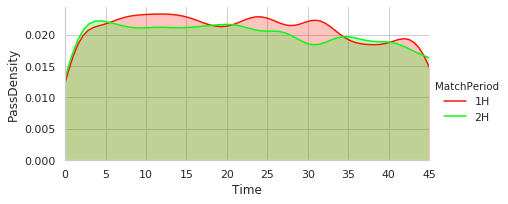

In [11]:
# pass Density
TimeData = data[data["EventType"] == "Pass"][["MatchPeriod", "EventTime", "EventType"]]
TimeData["EventTime"] /= 60.0

plt.figure(figsize=(30, 22))
facet = sns.FacetGrid(TimeData, hue="MatchPeriod", aspect=2, palette=sns.hls_palette(3, l=.5, s=.95))
facet.map(sns.kdeplot, "EventTime", shade=True)
facet.set(xlim=(0, 45))
facet.add_legend()
facet.set_axis_labels("Time", "PassDensity")


In [12]:
Pos = {}
for i in data[data['MatchID'] == 11][data['MatchPeriod'] == '1H'].index:
    if (data['TeamID'][i] != 'Huskies'):
        continue
    if (data["EventType"][i] == 'Substitution'):
        continue
    if (data["EventOrigin_x"][i] == float('nan') or data["EventOrigin_y"][i] == float('nan')):
        continue
    if (data["OriginPlayerID"][i] != ''):
        if (data["OriginPlayerID"][i] not in Pos.keys()):
            Pos[data["OriginPlayerID"][i]] = [
                [
                    float(data["EventOrigin_x"][i]),
                    float(data["EventOrigin_y"][i]),
                    data["MatchPeriod"][i],
                    data["EventTime"][i],
                ]
            ]
        else:
            Pos[data["OriginPlayerID"][i]].append(
                [
                    float(data["EventOrigin_x"][i]),
                    float(data["EventOrigin_y"][i]),
                    data["MatchPeriod"][i],
                    data["EventTime"][i],
                ]
            )
    if (data["EventDestination_x"][i] == float('nan') or data["EventDestination_y"][i] == float('nan')):
        continue
    if (data["DestinationPlayerID"][i] != ''):
        if (data["DestinationPlayerID"][i] not in Pos.keys()):
            Pos[data["DestinationPlayerID"][i]] = [
                [
                    float(data["EventDestination_x"][i]),
                    float(data["EventDestination_y"][i]),
                    data["MatchPeriod"][i],
                    data["EventTime"][i],
                ]
            ]
        else:
            Pos[data["DestinationPlayerID"][i]].append(
                [
                    float(data["EventDestination_x"][i]),
                    float(data["EventDestination_y"][i]),
                    data["MatchPeriod"][i],
                    data["EventTime"][i],
                ]
            )

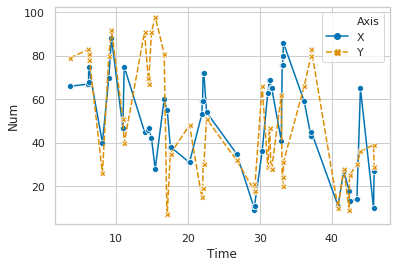

In [13]:
Pos['Huskies_M1'].sort(key=lambda x:x[3], reverse=False)
lM1 = len(Pos['Huskies_M1'])
M1_data = pd.DataFrame(index=range(lM1*2) ,columns=['Num', 'Axis', 'Time'])
for i in range(lM1):
    #if (i>0 and i<lM1-1 and (Pos['Huskies_M1'][i][3]-Pos['Huskies_M1'][i-1][3]<5 or Pos['Huskies_M1'][i+1][3]-Pos['Huskies_M1'][i][3]<5)):
        #continue
    M1_data['Num'][2*i] = int(Pos['Huskies_M1'][i][0])
    M1_data['Axis'][2*i] = 'X'
    M1_data['Time'][2*i] = float(Pos['Huskies_M1'][i][3] / 60.0)
    M1_data['Num'][2*i+1] = int(Pos['Huskies_M1'][i][1])
    M1_data['Axis'][2*i+1] = 'Y'
    M1_data['Time'][2*i+1] = float(Pos['Huskies_M1'][i][3] / 60.0)
M1_data
sns.lineplot(x=M1_data['Time'].astype('float'), y=M1_data['Num'].astype('int'), hue=M1_data['Axis'], markers=True, style=M1_data['Axis'], palette='colorblind')

In [14]:
PlayersAvgPos = {}
XAvg = {}
YAvg = {}
HalfTime = 2700.0
for i in Pos.keys():
    Pos[i].sort(key=lambda x: (x[2], x[3]), reverse=False)
    posNum = len(Pos[i])
    XAvg[i] = 0.0
    YAvg[i] = 0.0
    if (posNum == 1):
        XAvg[i] = Pos[i][0][0]
        YAvg[i] = Pos[i][0][1]
        continue
    for j in range(0, posNum, 1):
        if (j == 0):
            XAvg[i] += Pos[i][j][0] * Pos[i][j][3] + Pos[i][j][0] * (Pos[i][j+1][3] - Pos[i][j][3]) / 2
            YAvg[i] += Pos[i][j][1] * Pos[i][j][3] + Pos[i][j][1] * (Pos[i][j+1][3] - Pos[i][j][3]) / 2
        elif (j == posNum - 1):
            if Pos[i][j][3] <= HalfTime:  # 舍弃补时数据
                XAvg[i] += Pos[i][j][0] * (Pos[i][j][3] - Pos[i][j-1][3]) /2 + Pos[i][j][0] * (HalfTime - Pos[i][j][3])
                YAvg[i] += Pos[i][j][1] * (Pos[i][j][3] - Pos[i][j-1][3]) /2 + Pos[i][j][1] * (HalfTime - Pos[i][j][3])
        else:
            XAvg[i] += Pos[i][j][0] * (Pos[i][j+1][3] - Pos[i][j-1][3]) / 2
            YAvg[i] += Pos[i][j][1] * (Pos[i][j+1][3] - Pos[i][j-1][3]) / 2
    XAvg[i] /= HalfTime
    YAvg[i] /= HalfTime

In [15]:
AvgPos = pd.DataFrame(index=PlayersDict.keys(), columns=['XAvg', 'YAvg', 'Role'])
for i in XAvg.keys():
    if (i != float('nan')):
        AvgPos['XAvg'][i] = XAvg[i]
        AvgPos['YAvg'][i] = YAvg[i]
for i in AvgPos.index:
    AvgPos['Role'][i] = str(i)[8]
AvgPos
# XAvg, YAvg

,XAvg,YAvg,Role
Huskies_G1,NaN,NaN,G
Huskies_D1,NaN,NaN,D
Huskies_D2,NaN,NaN,D
Huskies_D3,NaN,NaN,D
Huskies_D4,NaN,NaN,D
Huskies_D5,NaN,NaN,D
Huskies_D6,NaN,NaN,D
Huskies_D7,NaN,NaN,D
Huskies_D8,NaN,NaN,D
Huskies_D9,NaN,NaN,D


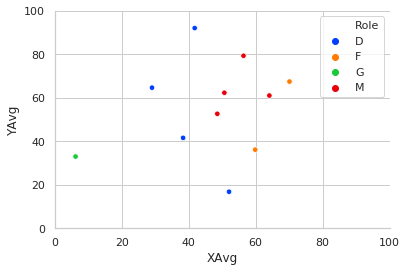

In [16]:
# plt.figure(figsize=(10,10))
# flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.set_palette(sns.color_palette("bright"))
sns.scatterplot(x='XAvg', y='YAvg', hue='Role', data=AvgPos, s=30)
plt.xlim(0,100)
plt.ylim(0,100)
sns.despine() # 去掉多余的线

In [17]:
import networkx as nx
G = nx.Graph()
G.add_nodes_from([1,2,3,4,5,6,7,8,9,10,11])
addList = [(1,3,4), (1,4,4),
           (2,3,6), (3,4,8), (4,5,6),
           (6,2,5), (6,3,5), (6,4,9), (6,5,9), (6,8,10), (6,10,10),
           (2,10,4), (2,11,6), (5,7,4), (5,8,6),
           (8,10,8), (8,7,4), (8,9,2), (10,11,4), (10,9,2),
           (7,9,3), (11,9,3)]
Nedge = len(addList)
nodecolor=['gold','darkblue','darkblue','darkblue','darkblue','green','firebrick','green','firebrick','green','firebrick']
edgecolor=[]
for i in range(Nedge):
    G.add_edge(addList[i][0],addList[i][1],weight=addList[i][2])
    # G.add_edge(addList[i][1],addList[i][0],weight=addList[i][2])
    # edgecolor.append(50.0/addList[i][2])
    edgecolor.append(50.0/addList[i][2])
plt.figure(figsize=(20,10))
sns.set_palette(sns.light_palette("purple"))
sns.set_style('white')
nx.draw(G, with_labels=True, node_size=3000, node_color=nodecolor, font_color='white',font_size=30, width=7, edge_color=sns.light_palette("purple"))

ModuleNotFoundError: No module named 'networkx'